In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [2]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
import matplotlib.pyplot as plt

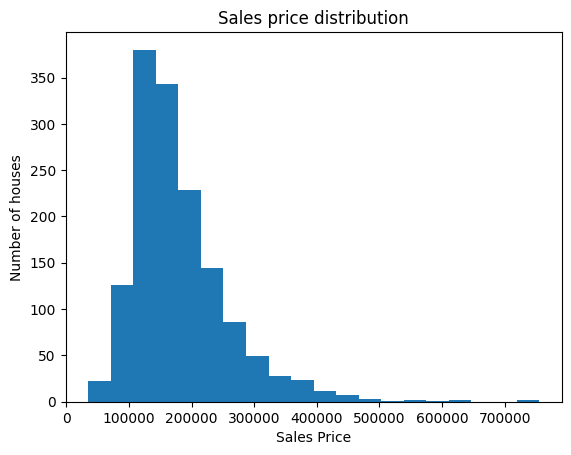

In [5]:
plt.hist(df["SalePrice"], bins=20)
plt.xlabel("Sales Price")
plt.ylabel("Number of houses")
plt.title("Sales price distribution")
plt.show()

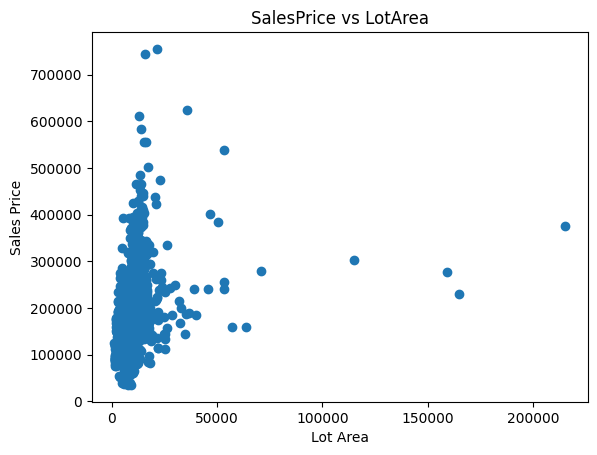

In [6]:
plt.scatter(df["LotArea"],df["SalePrice"])
plt.title("SalesPrice vs LotArea")
plt.xlabel("Lot Area")
plt.ylabel("Sales Price")
plt.show()

In [7]:
df.groupby("Neighborhood")["SalePrice"].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [8]:
df.groupby("MSZoning")["SalePrice"].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [9]:
#This gave me the overview of how ulities offered effected the saleprice
print(df.groupby("Utilities")["SalePrice"].mean())

print("\n\n")
#Then I noticed that there is only one row data of containing NoSeWa 
print(df.loc[df["Utilities"] == "NoSeWa"])

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64



      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
944  945          20       RL          NaN    14375   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
944         Lvl    NoSeWa  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
944      1   2009       COD        Abnorml     137500  

[1 rows x 81 columns]


Filling empty cells

In [10]:
df["LotFrontage"] = df["LotFrontage"].fillna(df["LotFrontage"].mean())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Feature Encoding/Selection

In [12]:
X = df[["MSSubClass","LotFrontage","LotArea", "YearBuilt", "YearRemodAdd"]]
X

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd
0,60,65.0,8450,2003,2003
1,20,80.0,9600,1976,1976
2,60,68.0,11250,2001,2002
3,70,60.0,9550,1915,1970
4,60,84.0,14260,2000,2000
...,...,...,...,...,...
1455,60,62.0,7917,1999,2000
1456,20,85.0,13175,1978,1988
1457,70,66.0,9042,1941,2006
1458,20,68.0,9717,1950,1996


In [13]:
df_encoded = pd.get_dummies(df[["MSZoning", "Street", "Alley", "LotShape", "Neighborhood", "HouseStyle", "OverallCond", "ExterCond", "BsmtCond", "GarageType", "GarageCond", "PoolQC"]], dtype=int)
X = pd.concat([X, df_encoded], axis=1)
X = X.drop("HouseStyle_2.5Fin", axis = 1)
X = X.drop("PoolQC_Fa", axis=1)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   LotFrontage           1460 non-null   float64
 2   LotArea               1460 non-null   int64  
 3   YearBuilt             1460 non-null   int64  
 4   YearRemodAdd          1460 non-null   int64  
 5   OverallCond           1460 non-null   int64  
 6   MSZoning_C (all)      1460 non-null   int64  
 7   MSZoning_FV           1460 non-null   int64  
 8   MSZoning_RH           1460 non-null   int64  
 9   MSZoning_RL           1460 non-null   int64  
 10  MSZoning_RM           1460 non-null   int64  
 11  Street_Grvl           1460 non-null   int64  
 12  Street_Pave           1460 non-null   int64  
 13  Alley_Grvl            1460 non-null   int64  
 14  Alley_Pave            1460 non-null   int64  
 15  LotShape_IR1         

In [15]:
import numpy as np

y = np.log(df.SalePrice)

Model Training

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=59)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("mse = ", mse)
print("r2 score = ", r2)

mse =  0.03934533574615324
r2 score =  0.756121598093357


Prediction

In [18]:
df_test = pd.read_csv("test.csv")
print(df_test.HouseStyle.unique())
#The 2.5Fin is not there in the test set

print(df_test.PoolQC.unique())
#The Fa is also missing

['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']
[nan 'Ex' 'Gd']


In [19]:
print(df.HouseStyle.unique())
print(df.PoolQC.unique())

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
[nan 'Ex' 'Fa' 'Gd']


In [20]:
df_test.LotFrontage = df_test.LotFrontage.fillna(df_test.LotFrontage.mean())

In [21]:
x_pred = df_test[["MSSubClass","LotFrontage","LotArea", "YearBuilt", "YearRemodAdd"]]

df_encoded_test = pd.get_dummies(df_test[["MSZoning", "Street", "Alley", "LotShape", "Neighborhood", "HouseStyle", "OverallCond", "ExterCond", "BsmtCond", "GarageType", "GarageCond", "PoolQC"]], dtype=int)
x_pred = pd.concat([x_pred, df_encoded_test], axis=1)
x_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1459 non-null   int64  
 1   LotFrontage           1459 non-null   float64
 2   LotArea               1459 non-null   int64  
 3   YearBuilt             1459 non-null   int64  
 4   YearRemodAdd          1459 non-null   int64  
 5   OverallCond           1459 non-null   int64  
 6   MSZoning_C (all)      1459 non-null   int64  
 7   MSZoning_FV           1459 non-null   int64  
 8   MSZoning_RH           1459 non-null   int64  
 9   MSZoning_RL           1459 non-null   int64  
 10  MSZoning_RM           1459 non-null   int64  
 11  Street_Grvl           1459 non-null   int64  
 12  Street_Pave           1459 non-null   int64  
 13  Alley_Grvl            1459 non-null   int64  
 14  Alley_Pave            1459 non-null   int64  
 15  LotShape_IR1         

In [49]:
price_pred = model.predict(x_pred)

In [50]:
price_pred = np.exp(price_pred)
prediction = pd.DataFrame(price_pred , columns= ["SalePrice"])
prediction.index = range(1461, 2920)
prediction.index.name = "Id"
prediction = prediction.reset_index()

In [51]:
prediction

,Id,SalePrice
0,1461,139973.249239
1,1462,148128.994558
2,1463,196595.573501
3,1464,198865.889368
4,1465,235088.093202
...,...,...
1454,2915,82580.477106
1455,2916,89923.141071
1456,2917,182990.854295
1457,2918,128733.796051


In [52]:
prediction.to_csv("Prediction.csv", index= None)

In [53]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']